# Fama-MacBeth Regression #

### Size, Value and Beta ###

In [69]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
from scipy import stats
import statsmodels.api as sm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_daily_financial_data
from capm_toolkit import wexp
from capm_toolkit import capm_regression

In [70]:
# Dictionary to store the DataFrames
# Dictionary to store the DataFrames
returns_df = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
returns_df.set_index('Date', inplace=True)
returns_df.index = pd.to_datetime(returns_df.index)

returns_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000222,-0.004989,-0.018352,-0.035215,-0.000721,-0.014722,-0.010052,...,-0.013900,0.000000,-0.017166,-0.011416,-0.027743,-0.064259,-0.020527,0.036625,-0.014177,-0.006022
2015-01-06,-0.015700,0.000094,-0.004962,-0.011421,-0.020350,-0.023753,-0.019911,-0.008324,-0.019973,-0.011709,...,-0.017255,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012351,-0.008513,-0.007231,-0.009804
2015-01-07,0.013184,0.013925,0.039621,0.008076,0.008190,0.010462,0.014920,0.008685,-0.002089,0.007747,...,0.016088,0.003045,0.028945,0.008598,0.010081,0.007857,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029534,0.037702,0.010404,0.020345,0.025135,0.017501,-0.014717,0.022681,0.024446,0.003522,...,0.019467,0.010722,0.011959,0.011532,0.016508,0.007517,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.014922,-0.000731,-0.008566,-0.007188,-0.009054,-0.011270,...,-0.011519,-0.001368,0.012422,-0.012361,-0.001411,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.002683,0.014782,0.004355,0.007822,0.012494,0.013291,...,0.009663,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,...,0.001981,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,...,-0.000630,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [71]:
# We can download the premiums in the Fama and French website
premiums_df = pd.read_csv(r'..\additional_data\famafrench_premiums.csv')
premiums_df.set_index('Date', inplace=True)
premiums_df.index = pd.to_datetime(premiums_df.index)
premiums_df.columns = ['mkt_premium', 'smb_premium', 'hml_premium', 'risk_free_rate']
premiums_df = premiums_df.div(100)

premiums_df

,mkt_premium,smb_premium,hml_premium,risk_free_rate
Date,,,,
2015-01-02,-0.0012,-0.0059,0.0012,0.00000
2015-01-05,-0.0184,0.0033,-0.0068,0.00000
2015-01-06,-0.0103,-0.0080,-0.0029,0.00000
2015-01-07,0.0119,0.0020,-0.0067,0.00000
2015-01-08,0.0181,-0.0012,-0.0029,0.00000
...,...,...,...,...
2025-03-25,0.0012,-0.0094,0.0005,0.00016
2025-03-26,-0.0122,-0.0048,0.0152,0.00016
2025-03-27,-0.0042,0.0019,0.0030,0.00016


In [72]:
# Get the important data for the Betas
ff_betas = pd.read_csv(r"..\additional_data\famafrench_betas.csv")
ff_betas = ff_betas.rename(columns={'Unnamed: 0': 'ticker'})
ff_betas.set_index('ticker', inplace = True)

ff_betas

,mkt_beta,smb_beta,hml_beta
ticker,,,
A,0.955686,0.079807,-0.134990
AAPL,1.161827,-0.290220,-0.378872
ABBV,0.616293,-0.301336,0.108055
ABT,0.786172,-0.290043,-0.130577
ADBE,1.253717,-0.235385,-0.681084
...,...,...,...
XYL,1.039345,0.146356,0.256511
YUM,0.760846,-0.183805,0.146926
ZBH,0.830569,0.124457,0.241640


In [73]:
# Intersect Dates
common_dates = returns_df.index.intersection(premiums_df.index)

# Filter for common dates
premiums_df = premiums_df.loc[common_dates]
returns_df = returns_df.loc[common_dates]

In [76]:
print(premiums_df.shape)
print(returns_df.shape)

(2515, 4)
(2515, 399)


In [77]:
# Initialize lists to store results
betas_list = []

# Loop over each available date in the returns DataFrame
for date in common_dates:

    rets = pd.DataFrame([returns_df.loc[date]], index=['returns']).transpose()
    
    # Merge returns with characteristics
    reg_df_data = pd.concat([rets, ff_betas], axis=1).dropna()

    # Define independent (X) and dependent (y) variables
    X = sm.add_constant(reg_df_data[['mkt_beta', 'smb_beta', 'hml_beta']])  
    y = reg_df_data['returns']  

    # Run the weighted least squares (WLS) regression
    model = sm.OLS(y, X, missing='drop')
    results = model.fit()

    # Extract coefficients, t-stats, and p-values
    params = results.params

    # Store results in separate lists
    betas_list.append(pd.Series(params, name=date)) 

# Convert lists to DataFrames
history_betas_df = pd.DataFrame(betas_list)

# Set the index as the dates
history_betas_df.index = common_dates

In [78]:
# Check the DataFrames
history_betas_df

,const,mkt_beta,smb_beta,hml_beta
Date,,,,
2015-01-05,0.002994,-0.017999,0.005649,-0.011527
2015-01-06,0.010438,-0.021203,0.000294,-0.000434
2015-01-07,0.023356,-0.011049,0.008575,-0.002507
2015-01-08,0.007883,0.011182,-0.002709,-0.000209
2015-01-09,-0.002871,-0.004302,0.006963,-0.004975
...,...,...,...,...
2024-12-24,-0.001512,0.010062,-0.002542,-0.001041
2024-12-26,0.004138,-0.003654,0.002645,0.001847
2024-12-27,-0.000241,-0.007539,-0.002887,0.003358


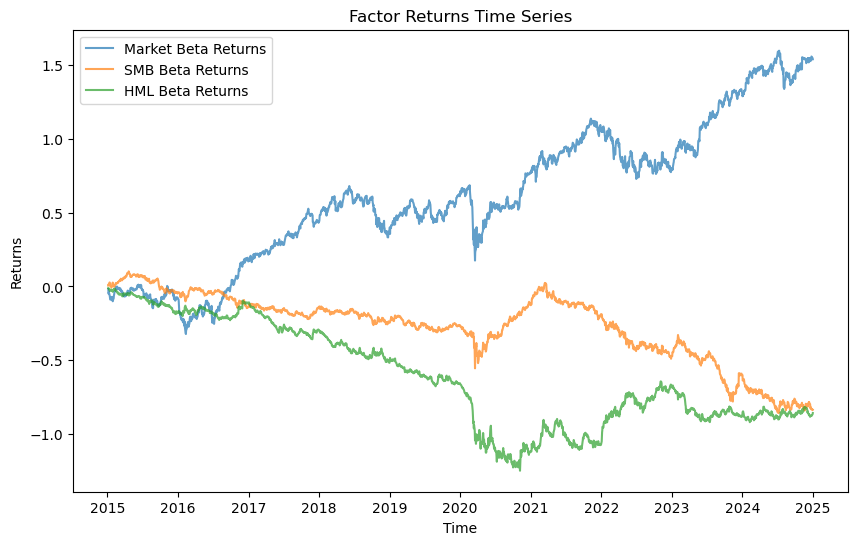

In [79]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['mkt_beta'].cumsum(), label='Market Beta Returns', alpha=0.7)
plt.plot(history_betas_df['smb_beta'].cumsum(), label='SMB Beta Returns', alpha=0.7)
plt.plot(history_betas_df['hml_beta'].cumsum(), label='HML Beta Returns', alpha=0.7)

# Config
plt.title('Factor Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

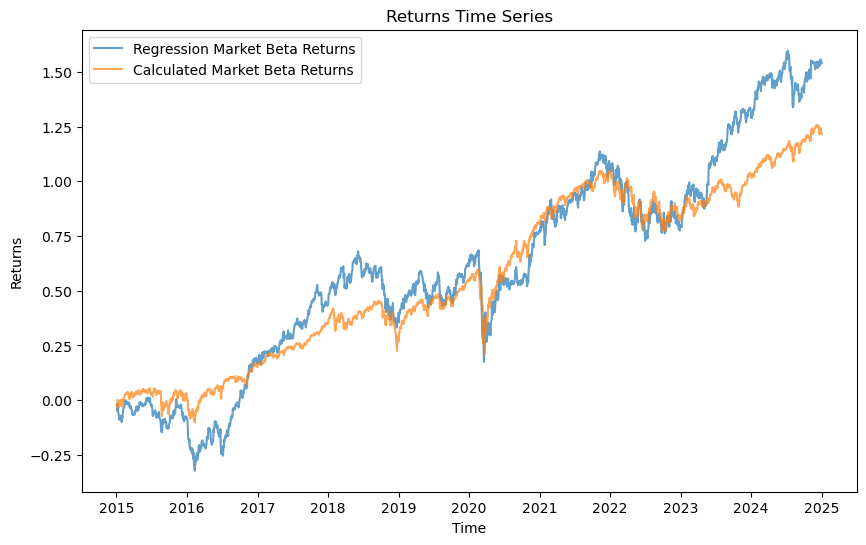

In [80]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['mkt_beta'].cumsum(), label='Regression Market Beta Returns', alpha=0.7)
plt.plot(premiums_df['mkt_premium'].cumsum(), label='Calculated Market Beta Returns', alpha=0.7)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

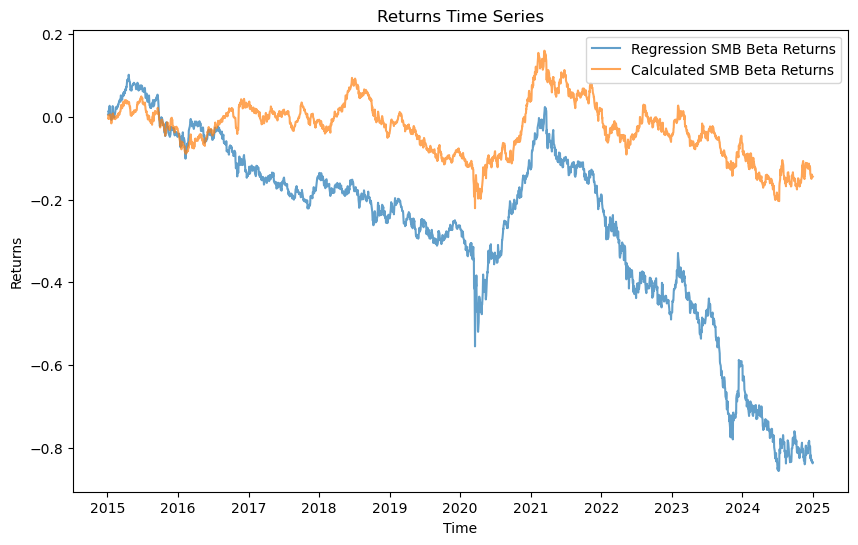

In [81]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['smb_beta'].cumsum(), label='Regression SMB Beta Returns', alpha=0.7)
plt.plot(premiums_df['smb_premium'].cumsum(), label='Calculated SMB Beta Returns', alpha=0.7)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

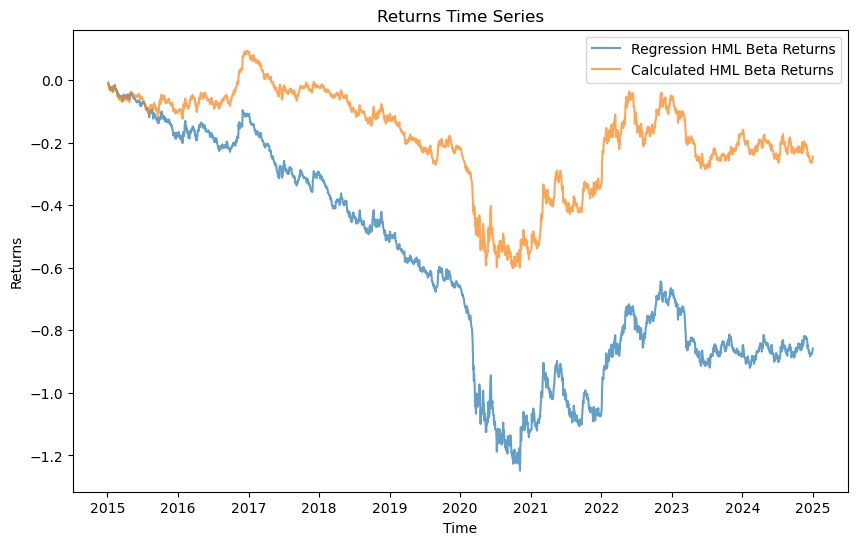

In [82]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['hml_beta'].cumsum(), label='Regression HML Beta Returns', alpha=0.7)
plt.plot(premiums_df['hml_premium'].cumsum(), label='Calculated HML Beta Returns', alpha=0.7)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

In [83]:
# Lets test the significance of these coefficients
def newey_west_std(errors, lag=4):
    """
    Computes Newey-West standard errors for a time series.
    
    Parameters:
    errors: Pandas Series or NumPy array of residuals (gamma estimates)
    lag: Maximum number of lags to consider (default: 4)
    
    Returns:
    Newey-West adjusted standard error
    """
    T = len(errors)
    gamma_var = errors.var()  # Start with variance of the series
    
    for l in range(1, lag + 1):
        weight = 1 - (l / (lag + 1))
        autocov = np.cov(errors[:-l], errors[l:])[0, 1]  # Autocovariance at lag l
        gamma_var += 2 * weight * autocov  # Newey-West adjustment

    return np.sqrt(gamma_var / T)  # Standard error

def fama_macbeth_significance_test(gamma_series, lag=4):
    """
    Performs statistical significance tests for Fama-MacBeth risk premia.

    Parameters:
    gamma_series: DataFrame where each column contains estimated gammas over time.
    lag: Lags for Newey-West standard errors (default: 4).

    Returns:
    DataFrame with mean gamma, standard error, t-statistics, and p-values.
    """
    gamma_means = gamma_series.mean()

    # Compute Newey-West adjusted standard errors
    gamma_std = gamma_series.apply(newey_west_std, lag=lag)

    # Compute t-statistics
    t_stats = gamma_means / gamma_std

    # Compute p-values
    p_values = 2 * (1 - stats.t.cdf(abs(t_stats), df=len(gamma_series) - 1))

    # Create results DataFrame
    results = pd.DataFrame({
        'Mean Gamma': gamma_means,
        'Std Error': gamma_std,
        't-stat': t_stats,
        'p-value': p_values
    })

    return results


In [84]:
# Now the Results

results = fama_macbeth_significance_test(history_betas_df[['mkt_beta',	'smb_beta',	'hml_beta']])

results

,Mean Gamma,Std Error,t-stat,p-value
mkt_beta,0.000612,0.000310,1.974109,0.048479
smb_beta,-0.000332,0.000182,-1.821029,0.068721
hml_beta,-0.000341,0.000200,-1.709688,0.087447
